In [9]:
import torch
from utils import *
import yaml
from models.models_pl import Generic_model
from models.models_pl import *
from callbacks.generators import *

#### Fahsion MNIST 034

In [10]:
### Here we do some preperations from the config
config = 'config/fmnist_0_3_4_final.yml'
config = yaml.load(open(config, "r"))
config = to_vae_config(config)
config['save_dir'] = './pretrained_models/'
config = prepare_variables_pl(config)

### Because we are using a pretrained global model we need to change the save dir. 


<ipython-input-10-a71a0d01d8e7>:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(open(config, "r"))


In [11]:
#Loading the encoder and decoder
encoder, decoder = load_encoder_decoder(config)

In [12]:
classifier = load_classifier(config)

load .pt


In [13]:
# Create model
model = Generic_model(config, encoder, decoder, classifier, None).to(config['device'])

In [14]:
### Next we load the dataset:
train_loader, val_loader = select_dataloader(config)
x_val = get_x_vals(val_loader, n_classes=config['number_of_classes'],
                   n_for_each_class=config['n_samples_each_class'])

In [15]:
samples = create_samples(x_val, model)

C:\Users\gerso\projects\FACT\models\CNN_classifier_author.py:41: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_out = F.softmax(out)


In [16]:
grids = create_latent_grids(samples, config["z_dim"])

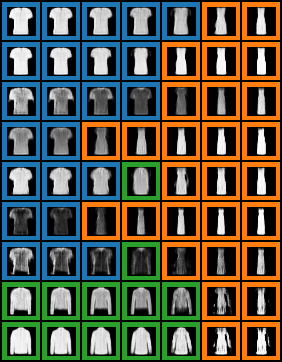

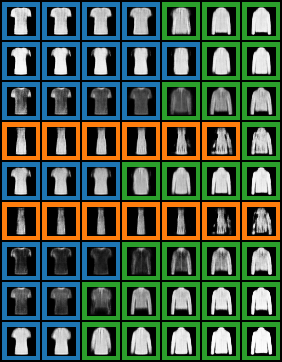

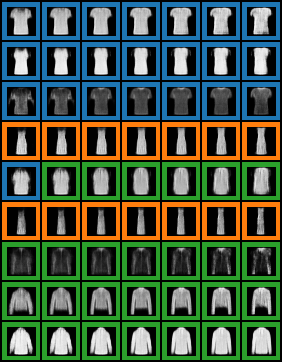

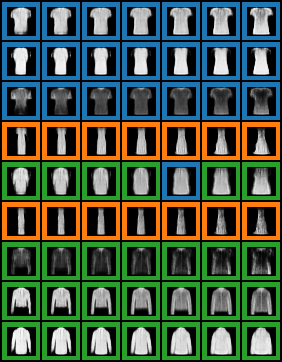

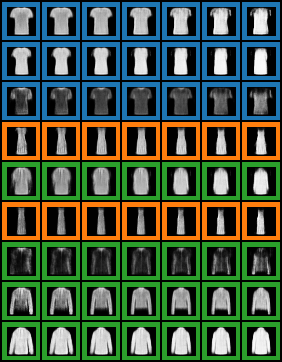

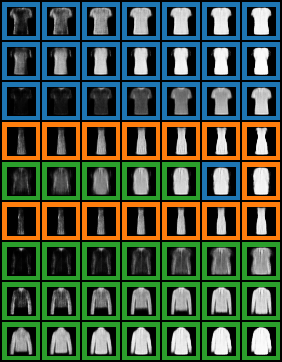

In [17]:
import torchvision
from IPython.display import Image 
imgs = []
for grid in grids:
    tensor = grid.cpu()
    img = torchvision.transforms.ToPILImage()(tensor)
    imgs.append(img)
    display(img)
